# Proyecto Final: Análisis Exploratorio de Datos (EDA) - Ventas de Autos

## Objetivos del Proyecto
- Realizar limpieza y transformación de datos.
- Aplicar análisis descriptivo utilizando `pandas`.
- Visualizar los patrones mediante `matplotlib`.
- Obtener insights relevantes para el negocio automotriz.


## Paso 1: Cargar los Datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("C:/Users/Ronald/Desktop/Proyectos/Proyecto Final/car_sales_data.csv")
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


## Paso 2: Información General del Dataset

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


## Paso 3: Limpieza y Transformación de Datos

In [4]:
# Copia del original
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Revisar tipos y valores
df.describe()


,engine_size,year_of_manufacture,mileage,price
count,49988.000000,49988.000000,49988.000000,49988.000000
mean,1.773140,2004.209630,112515.561215,13829.112387
std,0.734149,9.646056,71624.341062,16417.812203
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54375.250000,3059.750000
50%,1.600000,2004.000000,101011.500000,7971.000000
75%,2.000000,2012.000000,158617.250000,19028.500000
max,5.000000,2022.000000,453537.000000,168081.000000


## Paso 4: Análisis Descriptivo

In [5]:
# Estadísticas numéricas
df.describe()

# Valores únicos por columna categórica
df.select_dtypes(include='object').nunique()

manufacturer     5
model           15
fuel_type        3
dtype: int64

## Paso 5: Visualización de Datos

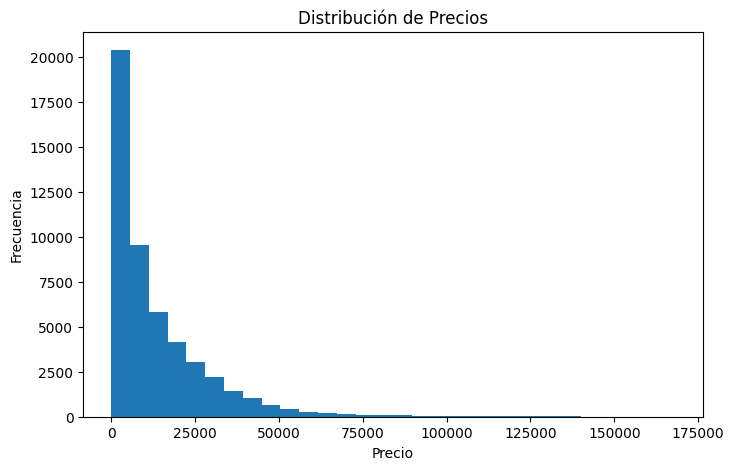

In [6]:
# Histograma de precios
plt.figure(figsize=(8, 5))
plt.hist(df['price'], bins=30)
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

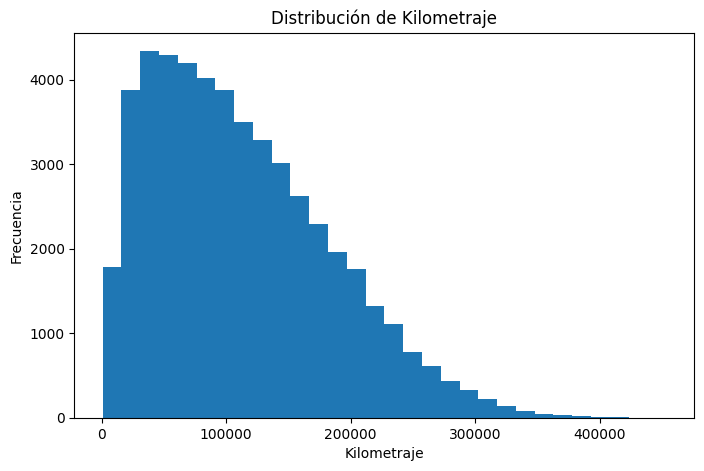

In [7]:
# Histograma de kilometraje
plt.figure(figsize=(8, 5))
plt.hist(df['mileage'], bins=30)
plt.title("Distribución de Kilometraje")
plt.xlabel("Kilometraje")
plt.ylabel("Frecuencia")
plt.show()

<Figure size 800x500 with 0 Axes>

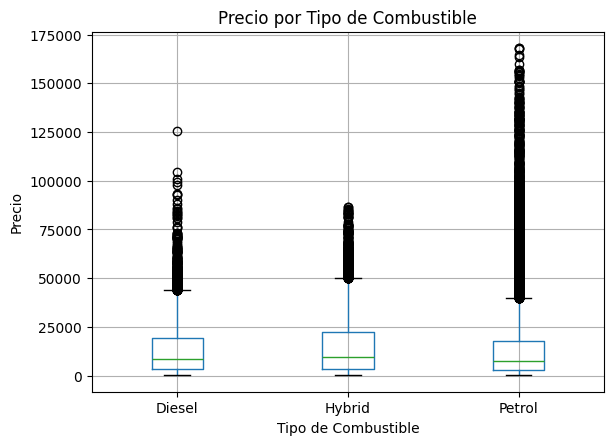

In [8]:
# Boxplot precio por tipo de combustible
plt.figure(figsize=(8, 5))
df.boxplot(column="price", by="fuel_type")
plt.title("Precio por Tipo de Combustible")
plt.suptitle("")
plt.xlabel("Tipo de Combustible")
plt.ylabel("Precio")
plt.show()

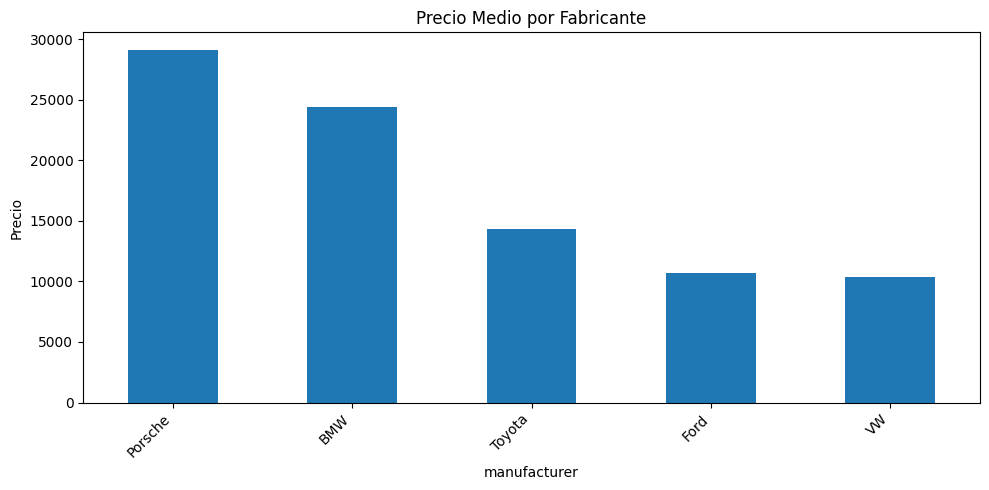

In [9]:
# Precio medio por fabricante
avg_price = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
avg_price.plot(kind='bar')
plt.title("Precio Medio por Fabricante")
plt.ylabel("Precio")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Conclusión
Este análisis exploratorio nos ha permitido entender mejor los patrones de precios según el fabricante, tipo de combustible y kilometraje.
